In [1]:
import PyPlot
const plt = PyPlot
using Distributions, StatsBase, DataFrames
include("ZZ_dominated_Hessian.jl")
include("ZZ_subsampling.jl")

acf (generic function with 1 method)

In [25]:
function logistic_data(d, Nobs) 
    X = ones(d, Nobs)
#     y = zeros(Nobs)
#     y[1] = 1
    y = rand(Binomial(1,0.001), Nobs)
    y[1] = 1
    return X, y
end

logistic_data (generic function with 1 method)

#### $1$-dimensional examples

In [26]:
d, Nobs = 1, 10^3
n_1, n_2 = 10^2, 10^3
X, y = logistic_data(d, Nobs);

In [27]:
sum(y)

2

In [28]:
β_0 = ones(d)
Print = false
σ = 10
A = eye(d);

In [66]:
weights = nothing 
replace = false
root = find_root(X, y, σ)
mb_size = 10

10

In [67]:
max_attempts = 10^4
N_samples = 10^4

start = time()
s_dh_1, b_dh_1 = ZZ_dominated_Hessian(X[:,1:n_1], y[1:n_1], max_attempts, β_0, σ, A) 
s_dh_2, b_dh_2 = ZZ_dominated_Hessian(X[:,1:n_2], y[1:n_2], max_attempts, β_0, σ, A) 
s_cv_1, b_cv_1 = ZZ_logistic(X[:,1:n_1], y[1:n_1], max_attempts, β_0, mb_size, root, σ, A, true)
s_cv_2, b_cv_2 = ZZ_logistic(X[:,1:n_2], y[1:n_2], max_attempts, β_0, mb_size, root, σ, A, true)
print( round((time()-start)/60, 2), " minutes to run \n")
samples_dh_1 = extract_samples(s_dh_1, b_dh_1, b_dh_1[end]/N_samples)
samples_dh_2 = extract_samples(s_dh_2, b_dh_2, b_dh_2[end]/N_samples)
samples_cv_1 = extract_samples(s_cv_1, b_cv_1, b_cv_1[end]/N_samples)
samples_cv_2 = extract_samples(s_cv_2, b_cv_2, b_cv_2[end]/N_samples)
print("Configuration temperatures: \n")
print("dH: ", round.([compute_configT(samples_dh_1, i, X[:,1:n_1], y[1:n_1], n_1, σ) for i in 1:d], 2),
              round.([compute_configT(samples_dh_2, i, X[:,1:n_2], y[1:n_2], n_2, σ) for i in 1:d], 2), "\n") 
print("cv: ", round.([compute_configT(samples_cv_1, i, X[:,1:n_1], y[1:n_1], n_1, σ) for i in 1:d], 2),
              round.([compute_configT(samples_cv_2, i, X[:,1:n_2], y[1:n_2], n_2, σ) for i in 1:d], 2), "\n")

9.3% of switches accepted 
4.3% of switches accepted 
0.95% of switches accepted 
0.23% of switches accepted 
0.21 minutes to run 
Configuration temperatures: 
dH: [0.99][0.92]
cv: [0.81][-11.53]


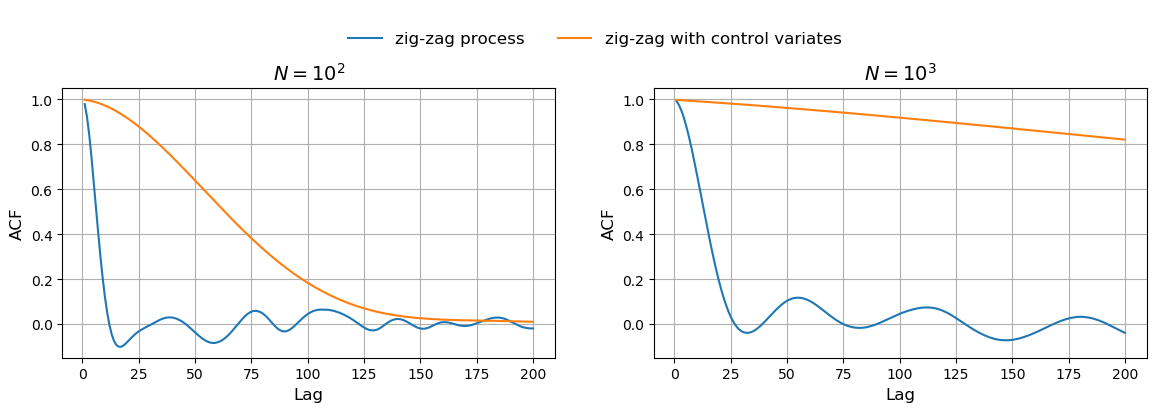

In [70]:
using PyPlot
fig = figure("pyplot_subplot_mixed",figsize=(14,3.5))
maxlag = 200
a, b = -0.15, 1.05

subplot(121) 
title(L"$N = 10^2$", fontsize=14)
plot(1:maxlag, acf(samples_dh_1[1,:], maxlag), label="zig-zag process")
plot(1:maxlag, acf(samples_cv_1[1,:], maxlag), label="zig-zag with control variates")
grid("on")
ylabel("ACF", fontsize=12)
xlabel("Lag", fontsize=12)
ylim([a,b])

subplot(122) 
title(L"$N = 10^3$", fontsize=14)
plot(1:maxlag, acf(samples_dh_2[1,:], maxlag))
plot(1:maxlag, acf(samples_cv_2[1,:], maxlag))
grid("on")
ylabel("ACF", fontsize=12)
xlabel("Lag", fontsize=12)
ylim([a,b])

plt.figlegend(ncol=2,loc="upper center", bbox_to_anchor = (0,0.13,0.85,1), frameon=false, fontsize=12);

In [50]:
using Plots
pyplot()

Plots.PyPlotBackend()

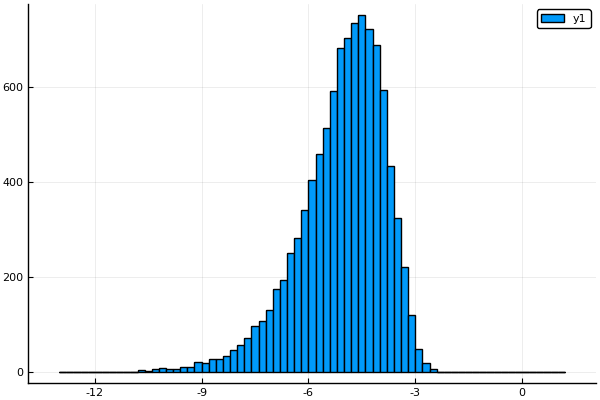

In [63]:
histogram(samples_dh_1[1,:], bins=:scott)

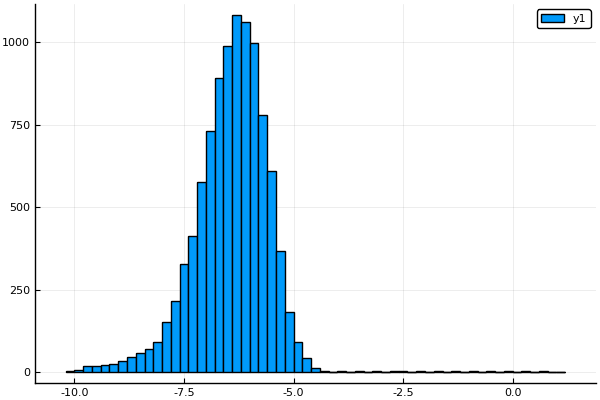

In [54]:
histogram(samples_dh_2[1,:], bins=:scott)